<a href="https://colab.research.google.com/github/soumyakuberan/assignment-project/blob/master/edureka_midtermproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1: Import the required libraries and load the training and testing dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV

# Load the training and testing datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [3]:
# Assuming 'train_label' is your dataset with the 'Total_booking' column
train_label = pd.read_csv('train_label.csv')

# Append 'Total_booking' column to the original 'train.csv' dataset
train_data = pd.read_csv('train.csv')
train_data['Total_booking'] = train_label['Total_booking']

# Assuming 'test_label' is your dataset with the 'Total_booking' column
test_label = pd.read_csv('test_label.csv')

# Append 'Total_booking' column to the original 'test.csv' dataset
test_data = pd.read_csv('test.csv')
test_data['Total_booking'] = test_label['Total_booking']

# Continue with the rest of the tasks...


**Task 2: Analyze the dataset and write your observations**

In [4]:
# Check the shape of the training and testing set
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)

# Print the data types of each column
print("\nData Types:")
print(train_data.dtypes)

# Check missing values present in the dataset
print("\nMissing Values:")
print(train_data.isnull().sum())


Training Data Shape: (8708, 10)
Testing Data Shape: (2178, 10)

Data Types:
datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
dtype: object

Missing Values:
datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64


**Task 3: Perform Feature Engineering**

In [5]:
# Create new columns date, hour, weekDay, month from datetime column
train_data['datetime'] = pd.to_datetime(train_data['datetime'])
train_data['date'] = train_data['datetime'].dt.date
train_data['hour'] = train_data['datetime'].dt.hour
train_data['weekDay'] = train_data['datetime'].dt.dayofweek
train_data['month'] = train_data['datetime'].dt.month

# Coerce the datatype of season, holiday, workingday, and weather to category
train_data[['season', 'holiday', 'workingday', 'weather']] = train_data[['season', 'holiday', 'workingday', 'weather']].astype('category')

# Drop the datetime column as we have already extracted useful features from it
train_data.drop(['datetime'], axis=1, inplace=True)


**Task 4: Perform Outlier Analysis**

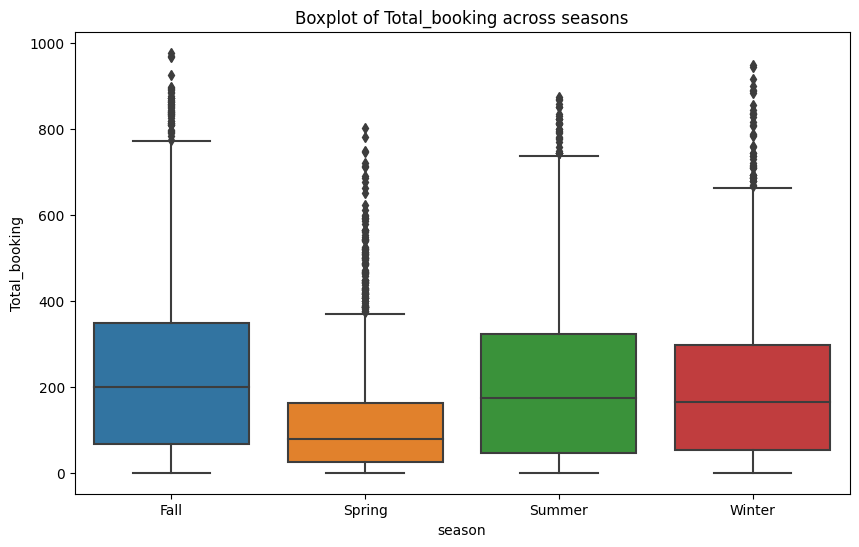

In [6]:
# Example for 'season' feature
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='Total_booking', data=train_data)
plt.title('Boxplot of Total_booking across seasons')
plt.show()

# Remove the outliers present in the dataset
Q1 = train_data['Total_booking'].quantile(0.25)
Q3 = train_data['Total_booking'].quantile(0.75)
IQR = Q3 - Q1
train_data = train_data[~((train_data['Total_booking'] < (Q1 - 1.5 * IQR)) | (train_data['Total_booking'] > (Q3 + 1.5 * IQR)))]


**Task 5: Perform Correlation Analysis**

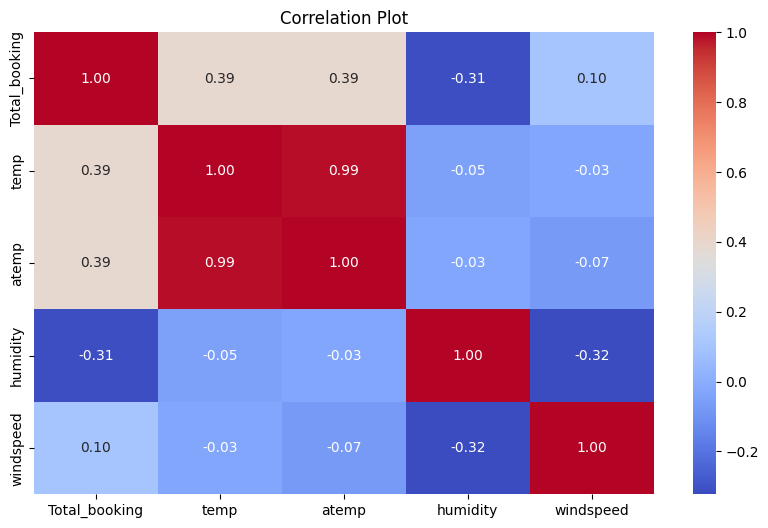

In [7]:
# Plot a correlation plot
plt.figure(figsize=(10, 6))
correlation_matrix = train_data[['Total_booking', 'temp', 'atemp', 'humidity', 'windspeed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Plot')
plt.show()


**Task 6: Perform Data Visualization**

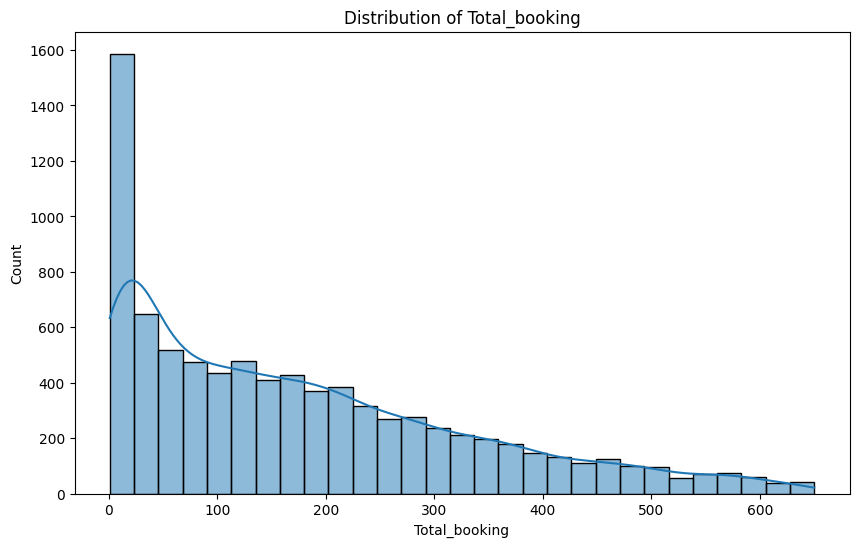

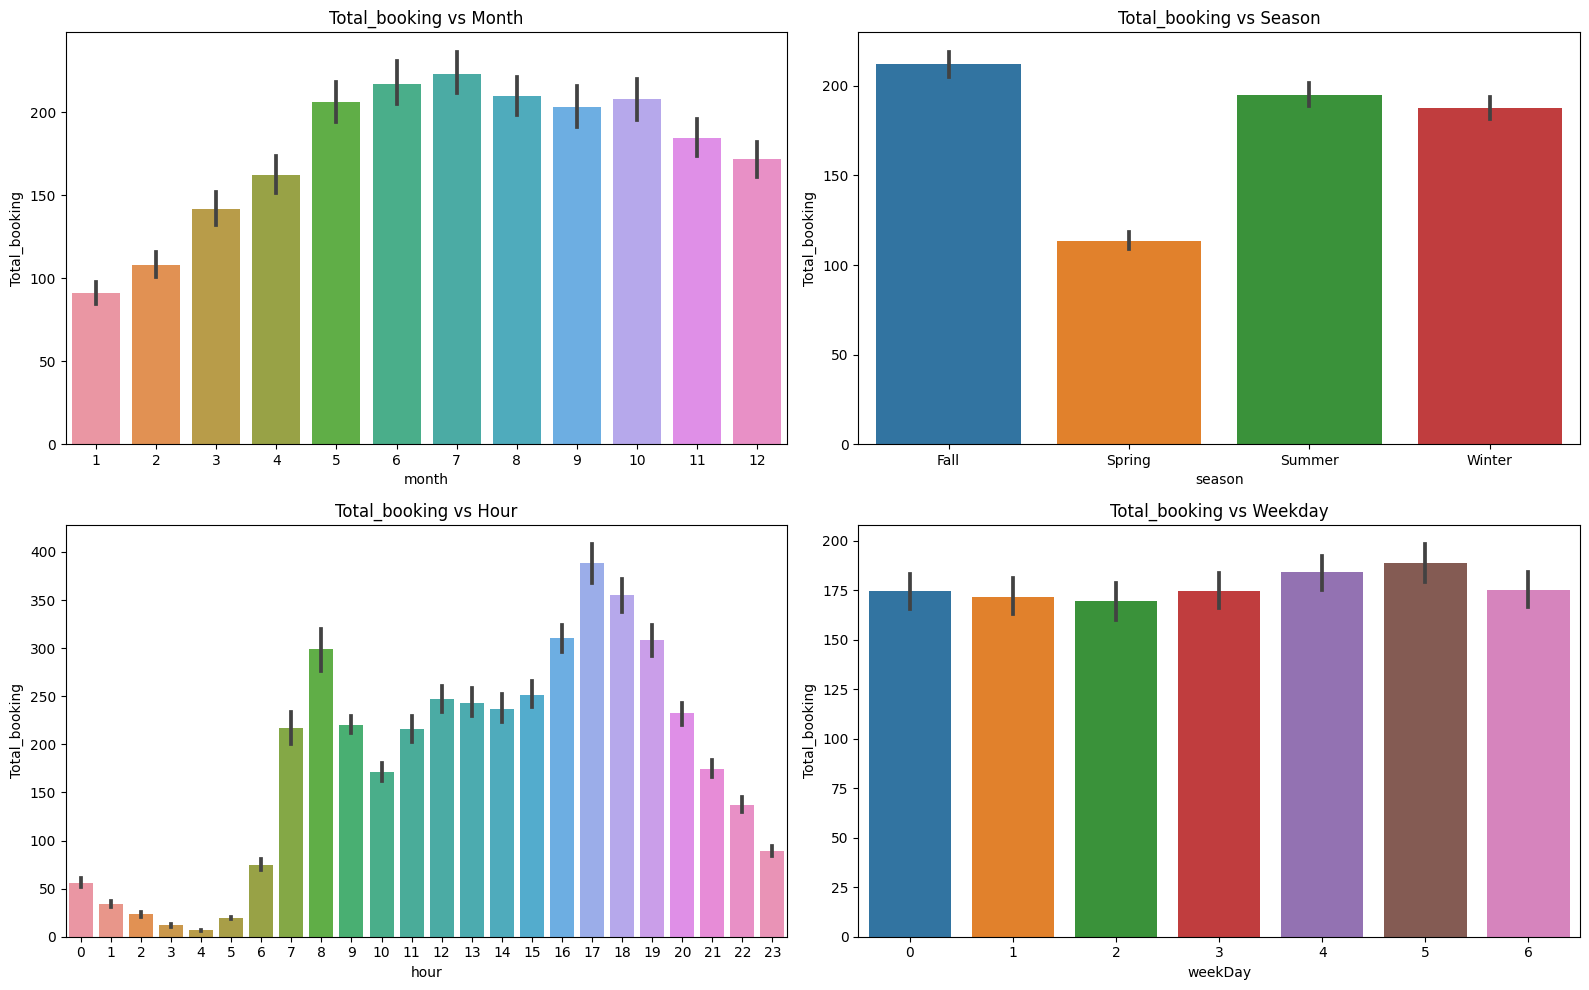

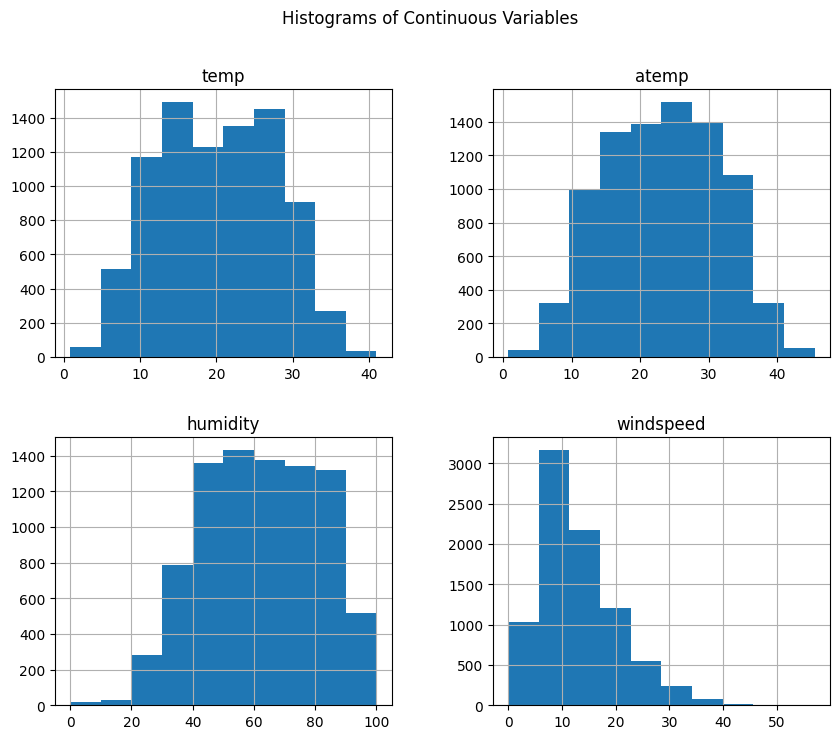

In [8]:
# Visualize distribution of 'Total_booking' column
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Total_booking'], kde=True)
plt.title('Distribution of Total_booking')
plt.show()

# Visualize total_booking vs (Month, Season, Hour, Weekday)
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
sns.barplot(x='month', y='Total_booking', data=train_data)
plt.title('Total_booking vs Month')

plt.subplot(2, 2, 2)
sns.barplot(x='season', y='Total_booking', data=train_data)
plt.title('Total_booking vs Season')

plt.subplot(2, 2, 3)
sns.barplot(x='hour', y='Total_booking', data=train_data)
plt.title('Total_booking vs Hour')

plt.subplot(2, 2, 4)
sns.barplot(x='weekDay', y='Total_booking', data=train_data)
plt.title('Total_booking vs Weekday')

plt.tight_layout()
plt.show()

# Use Histograms to plot all the continuous variables
train_data[['temp', 'atemp', 'humidity', 'windspeed']].hist(figsize=(10, 8))
plt.suptitle('Histograms of Continuous Variables')
plt.show()


**Task 7: Convert the categorical variables into one hot vector**

In [9]:
# Assuming train_data is your training dataset
train_data = pd.get_dummies(train_data, columns=['season', 'holiday', 'workingday', 'weather'], drop_first=True)


**Task 8: Split your dataset for training and testing**

In [10]:
# Assuming X contains your features and y contains the target variable
X = train_data.drop(['Total_booking'], axis=1)
y = train_data['Total_booking']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Task 9: Fit various models**

In [15]:
# Initialize models
rf_model = RandomForestRegressor()
ada_model = AdaBoostRegressor()
bagging_model = BaggingRegressor()
svr_model = SVR()
knn_model = KNeighborsRegressor()

# Fit the models
rf_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)
bagging_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)


TypeError: float() argument must be a string or a real number, not 'datetime.date'

In [17]:
# Initialize models
rf_model = RandomForestRegressor()
ada_model = AdaBoostRegressor()
bagging_model = BaggingRegressor()
svr_model = SVR()
knn_model = KNeighborsRegressor()

# Fit the models
rf_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)
bagging_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)


TypeError: float() argument must be a string or a real number, not 'datetime.date'

In [22]:
# Initialize models
rf_model = RandomForestRegressor()
ada_model = AdaBoostRegressor()
bagging_model = BaggingRegressor()
svr_model = SVR()
knn_model = KNeighborsRegressor()

y_train = y_train.astype(np.float32)

# Fit the models
rf_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)
bagging_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

TypeError: float() argument must be a string or a real number, not 'datetime.date'

**Task 10: Display a Factor plot to visualize the RMSE values**

In [23]:
# Assuming you have models fitted and X_test, y_test ready
models = [rf_model, ada_model, bagging_model, svr_model, knn_model]
model_names = ['Random Forest', 'Ada Boost', 'Bagging', 'SVR', 'K-Neighbors']
rmse_values = []

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)

# Create a Factor plot
plt.figure(figsize=(10, 6))
sns.factorplot(x=model_names, y=rmse_values, kind='bar', size=5, aspect=2)
plt.title('RMSE Values for Different Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()


TypeError: float() argument must be a string or a real number, not 'datetime.date'

**Task 11: Perform Hyper-parameter tuning on the best model using GridSearchCV**

In [24]:
# Assuming you want to perform tuning on the Random Forest model
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)



ValueError: 
All the 405 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
TypeError: float() argument must be a string or a real number, not 'datetime.date'
